# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|10/22/2018|10/24/2018|10/29/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [184]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  300000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,16.880,4200.0,249.0
HYG,0.014,84.255,4200.0,50.0
IEF,0.417,100.175,125100.0,1249.0
IWM,0.014,152.935,4200.0,27.0
LQD,0.500,111.975,150000.0,1340.0
QQQ,0.014,167.665,4200.0,25.0
SPY,0.014,271.790,4200.0,15.0
VNQ,0.014,78.875,4200.0,53.0


## Checking market correlations

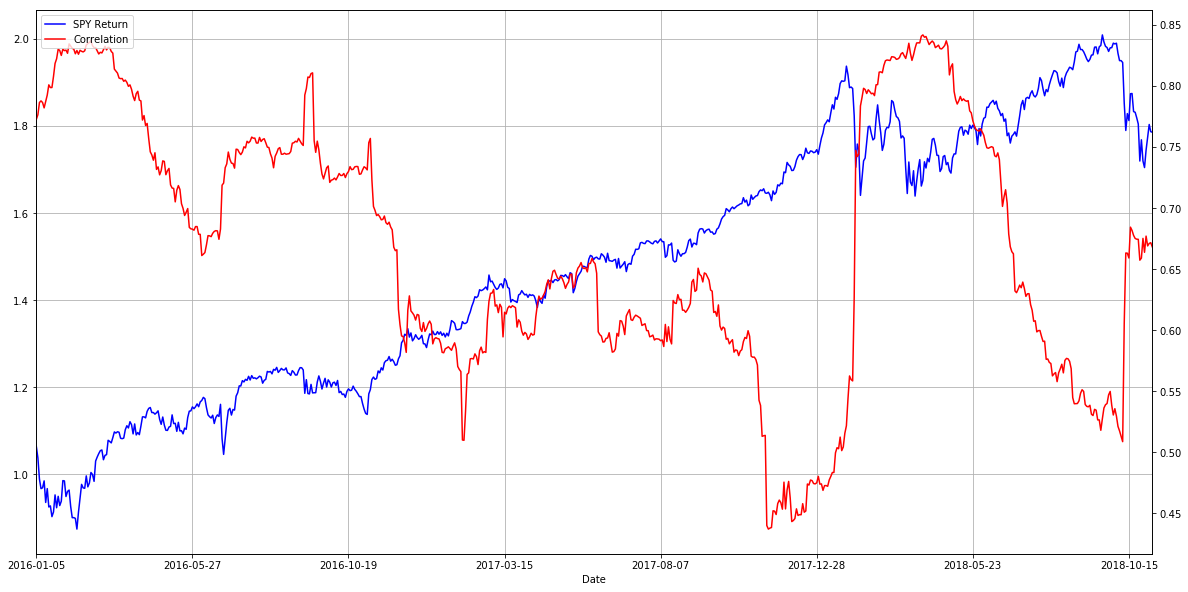

                XLRE       XLV       XLI       XLK       XLE       XLU  \
2018-10-30  0.432195  0.915944  0.850794  0.915956  0.729119  0.019087   
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.729650 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.734797 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.735113 -0.010320   
2018-11-05  0.394213  0.908860  0.854410  0.910291  0.741053 -0.014919   

                 XLB       XLP       XLF       XLY  Avg_Corr   SPY_cum  
2018-10-30  0.753220  0.441545  0.808454  0.904015  0.677033  1.744600  
2018-10-31  0.759625  0.415250  0.813259  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.427726  0.812704  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.431493  0.811104  0.901108  0.671634  1.786829  
2018-11-05  0.759688  0.427110  0.804210  0.896806  0.668172  1.785804  


In [3]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [4]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLC,XLE,XLU,XLB,XLP,XLF,XLY
2018-10-30,-0.028058,0.032698,0.043837,-0.052984,-0.052359,-0.097078,-0.106904,0.082487,-0.112669,0.087544,-0.052285,-0.069243
2018-10-31,-0.017677,0.018730,0.045251,-0.045746,-0.029819,-0.078463,-0.101418,0.069735,-0.100530,0.077360,-0.039122,-0.057255
2018-11-01,-0.007223,0.022540,0.058449,-0.028950,-0.018480,-0.073058,-0.093792,0.064953,-0.075227,0.084998,-0.034735,-0.038021
2018-11-02,-0.013103,0.013968,0.051850,-0.030589,-0.037659,-0.082466,-0.096066,0.058976,-0.077449,0.079318,-0.035466,-0.034085
2018-11-05,-0.013466,0.026667,0.057742,-0.031681,-0.048439,-0.089071,-0.086165,0.067244,-0.081381,0.086173,-0.026464,-0.042315


## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [247]:
date_lookup = '2018-11-07'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]

In [248]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
focus_names = acs.index.drop_duplicates().tolist()
acs

,Call Time,EPS Estimate,Name
XXII,After Market Close,-,22nd Century Group Inc
UHAL,After Market Close,7.91,Amerco
ANSS,After Market Close,1.09,ANSYS Inc
ADT,After Market Close,0.26,ADT Inc
ACHV,After Market Close,-1.28,Achieve Life Sciences Inc
AVLR,After Market Close,-0.17,Avalara Inc
AWX,After Market Close,-,Avalon Holdings Corp
WMC,After Market Close,0.32,Western Asset Mortgage Capital Corp
AXAS,After Market Close,0.05,Abraxas Petroleum Corp
AKBA,After Market Close,-0.64,Akebia Therapeutics Inc


In [7]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

0.79% Completed
1.57% Completed
No revenues for ASH
2.36% Completed
No performance_summary for AQST
No revenues for KAR
3.15% Completed
No revenues for AJX
3.94% Completed
4.72% Completed
5.51% Completed
No revenues for PAA
6.30% Completed
No revenues for ATHX
7.09% Completed
No revenues for AIZ
7.87% Completed
8.66% Completed
No analyst_recs for ATRI
No sales_surprises for ATRI
9.45% Completed
No revenues for LNT
10.24% Completed
11.02% Completed
11.81% Completed
12.60% Completed
13.39% Completed
No insiders_txns for IOVA
No revenues for BEL
No insiders_txns for BEL
14.17% Completed
14.96% Completed
No revenues for DVN
15.75% Completed
No revenues for CTSO
16.54% Completed
No revenues for TWO
17.32% Completed
18.11% Completed
No revenues for CPE
18.90% Completed
19.69% Completed
20.47% Completed
21.26% Completed
22.05% Completed
No performance_summary for FNHC
No revenues for GV
No estimates for GV
No recommendations for GV
No analyst_recs for GV
No sales_analysis for GV
No sales_surp

In [242]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [243]:
scores_df.sort_values(['ValuationScore','TotalScore'])

,FinStrengthScore,GrowthRateScore,PerfRankScore,ProfitScore,ReturnScore,ValuationScore,TotalScore
FIVN,0.0,42.86,89.29,15.0,100.0,12.50,43.275000
NEWR,40.0,57.14,89.29,20.0,100.0,12.50,53.155000
MTCH,0.0,7.14,77.37,40.0,100.0,18.75,40.543333
TWLO,20.0,28.57,82.93,5.0,90.0,18.75,40.875000
ZG,80.0,71.43,57.68,20.0,40.0,18.75,47.976667
DATA,50.0,42.86,89.29,20.0,100.0,18.75,53.483333
ETSY,40.0,42.86,87.88,45.0,90.0,18.75,54.081667
DXCM,40.0,71.43,80.81,30.0,100.0,18.75,56.831667
ACAD,80.0,42.86,80.81,25.0,100.0,18.75,57.903333
EVRI,0.0,35.71,82.83,20.0,30.0,25.00,32.256667


In [223]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    curr_options = all_options(name,100,1,moneyness=0.1)
    if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
        options_dict[name] = curr_options

In [224]:
for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        if i == 2 or i == 3 or i == 1:
            print(df[df.index == selected_name])
        elif i == 11:
            print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
            print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                      'Type']).agg({'Underlying':'count',
                                                                                                    'Shares Traded': 'sum'}))
        else:
            print(df[df.Underlying == selected_name])
        print('\n')

TRUE
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.02          0.01        0.01              1.0       TRUE 2017-09-30   
1      0.05          0.05           0              NaN       TRUE 2017-12-31   
2      0.01             0        0.01              0.0       TRUE 2018-03-31   
3      0.03             0        0.03              0.0       TRUE 2018-06-30   

   Stock_closeToOpen EarningsDate  
0          -0.302326   2017-11-06  
1          -0.046180   2018-02-15  
2          -0.114423   2018-05-08  
3           0.035149   2018-08-09  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
TRUE  2.61       NaN                 NaN               NaN            -0.36   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
TRUE       16.42      11.37       8.75           1160.55               27.29   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
TRUE        

7    26.83      Price to Cash Flow (TTM)     27.34    15.30       MTCH


   Company                                 Field  industry  sector Underlying
0    12.45         Sales (MRQ) vs Qtr. 1 Yr. Ago     19.71   20.10       MTCH
1    16.06          Sales (TTM) vs TTM 1 Yr. Ago     19.68    6.09       MTCH
2      NaN             Sales - 5 Yr. Growth Rate     20.37    5.19       MTCH
3    22.41           EPS (MRQ) vs Qtr. 1 Yr. Ago     44.67  120.99       MTCH
4    92.08            EPS (TTM) vs TTM 1 Yr. Ago       NaN     NaN       MTCH
5      NaN               EPS - 5 Yr. Growth Rate     16.70   11.06       MTCH
6      NaN  Capital Spending - 5 Yr. Growth Rate     17.20    3.42       MTCH


   Company                           Field  industry  sector Underlying
0    80.29              Gross Margin (TTM)     38.16   40.50       MTCH
1      NaN       Gross Margin - 5 Yr. Avg.     46.73   37.13       MTCH
2    31.03              EBITD Margin (TTM)       NaN     NaN       MTCH
3      NaN   

In [240]:
shorts = ['TRUE', 'OSTK']

longs = ['ACAD', 'ACRS']

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))
summary_df[summary_df.index.isin(shorts + longs)].T

      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
OSTK              40.0            21.43          50.61          0.0   
ACRS              60.0             0.00          80.81          0.0   
TRUE              50.0            42.86          47.98         20.0   
ACAD              80.0            42.86          80.81         25.0   

      ReturnScore  ValuationScore  TotalScore  
OSTK          0.0           37.50   24.923333  
ACRS         30.0           25.00   32.635000  
TRUE         60.0           25.00   40.973333  
ACAD        100.0           18.75   57.903333  
            surprisePercent    Quarter  Stock_closeToOpen
Underlying                                               
ACAD                  0.145 2017-09-30           0.032656
ACAD                  0.052 2017-12-31          -0.108793
ACAD                  0.200 2018-03-31           0.091022
ACAD                 -0.133 2018-06-30          -0.087019
ACRS                  0.267 2017-09-30          -0.00333

,OSTK,ACRS,TRUE,ACAD
Beta,1.26,NaN,2.61,3.76
Dividend,NaN,NaN,NaN,NaN
EPS (TTM) Industry,NaN,NaN,NaN,NaN
EPS (TTM) Sector,NaN,NaN,NaN,NaN
EPS (TTM) Stock,-0.52,-2.03,-0.36,-2.53
High52Week,88.45,26.25,16.42,35.49
LastPrice,19.80,12.24,11.37,21.66
Low52Week,19.08,11.00,8.75,12.77
Market Cap(Mil.),750.01,828.20,1160.55,4717.31
P/E (TTM) Industry,34.43,84.80,27.29,84.80


In [241]:
selected_name = 'ACRS'

print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                          'Type']).agg({'Underlying':'count',
                                                                                        'Shares Traded': 'sum'}))
# print(options_dict[selected_name])

aq = alphaquery(selected_name)
print(aq.vol_df)

                                           Underlying  Shares Traded
Trading Date Title                   Type                           
2018-06-30   Chief Executive Officer Buy            8        88532.0
                                     Sell           4        13820.0
             Chief Financial Officer Buy           12        30800.0
                                     Sell           4         5920.0
             Director                Buy            8       108800.0
                                     Sell           4         9200.0
             Officer                 Buy           16        85532.0
                                     Sell          28        84348.0
2018-09-30   Director                Buy            8        51400.0
2018-12-31   Director                Buy            8      1516772.0
                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volat

In [246]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df.sort_values(['ValuationScore','TotalScore']).join(summary_df).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]